Load a random vector with the divide-and-conquer state preparation.

In [14]:
%pip install numpy
%pip install -U qiskit-aer
%pip install -U qiskit
%pip install matplotlib
%pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 14.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.1.0
    Uninstalling qiskit-1.1.0:
      Successfully uninstalled qiskit-1.1.0
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
from encoding import Encoding
from qiskit import ClassicalRegister, visualization, transpile

In [16]:
input_vector = 2*np.random.rand(16)-1
input_vector = input_vector / np.linalg.norm(input_vector)
expected_probabilities = input_vector ** 2

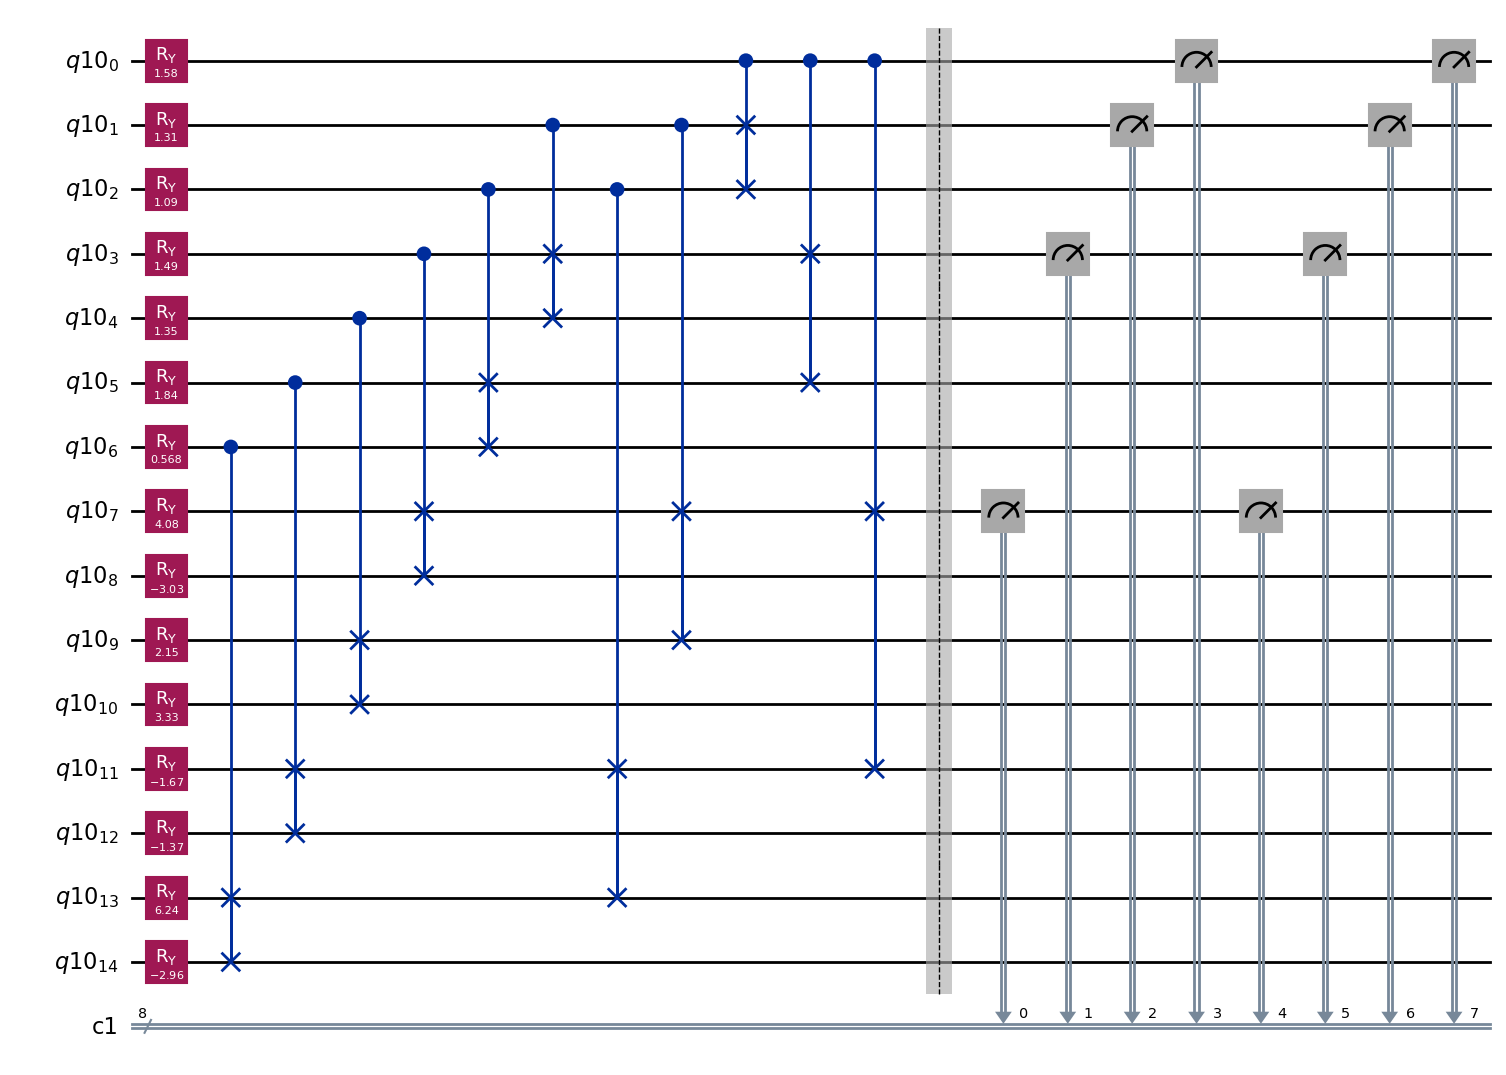

In [17]:
encode = Encoding(input_vector, 'dc_amplitude_encoding')
output = ClassicalRegister(len(encode.output_qubits))
encode.qcircuit.add_register(output)
encode.qcircuit.barrier()

for k, value in enumerate(reversed(encode.output_qubits)):
    encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')

In [18]:
from qiskit_aer import Aer

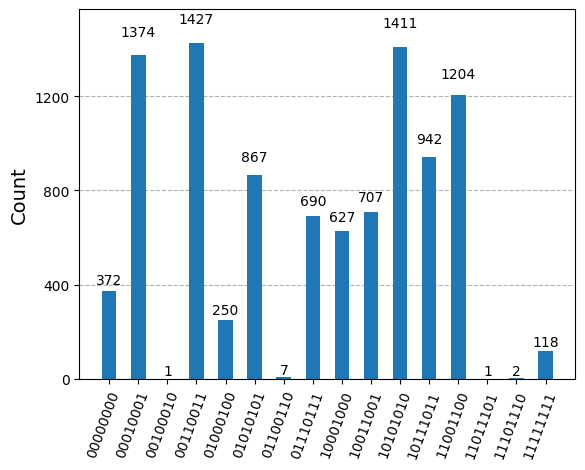

In [19]:
circuit = encode.qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 10000
#job = execute(circuit, backend_sim, shots = shots)
new_circuit = transpile(circuit, backend_sim)
job = backend_sim.run(new_circuit, shots = shots)
results = job.result()
counts = results.get_counts()
visualization.plot_histogram(counts)

In [20]:
expected_probabilities



array([3.48025406e-02, 1.35345833e-01, 4.22084911e-04, 1.43643555e-01,
       2.54304079e-02, 8.63546671e-02, 6.45632056e-04, 7.10928499e-02,
       6.10731217e-02, 7.40030957e-02, 1.39455694e-01, 9.28694309e-02,
       1.24208465e-01, 5.76372217e-05, 9.09798867e-05, 1.05040056e-02])